<h1 align="center">
    Flip-Flat: A real estate house price predictor📊</h1>
<img src="https://i.ibb.co/FHzgLJB/BE263-D1-B-6617-43-E0-AFE6-BDF13-EAF5319.jpg" alt="logo" width="500" height="600">




<img src="https://belbex.com/blog/wp-content/uploads/2020/12/real-estate.jpg" alt="logo" width="500" height="600">




## Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import pycountry
import pycountry_convert as pc
import country_converter as coco
import geopandas as gpd
from matplotlib.colors import ListedColormap
import datetime as dt


import pandas as pd

from sklearn.model_selection import train_test_split

import pandas as pd
import src.cleaning as cleaning
import src.sql_queries as sql_queries
import src.machine_learning as machine_learning
import pymysql
import sqlalchemy as alch # python -m pip install --upgrade 'sqlalchemy<2.0'

from getpass import getpass
import pandas as pd
from sqlalchemy import create_engine, text
import time
from dotenv import load_dotenv
import os
from sklearn import preprocessing

## Objective
### Flip-Flat is a live tools created in 2023 by Miguel Palos Pou to help potential buyers get a fair value for their new flat and help sellers understand the market trends.
#### Flip-Flat provides a price prediction for a flat based on user inputs, including number of rooms, floor, square meters, neighborhood, etc.


In [2]:

df=cleaning.extraction()

In [3]:
df=cleaning.cleaning(df)
df.sample()

/Users/miguelpalospou/Desktop/IRONHACK/Projects/Final-project/src/cleaning.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['rooms'] = df['rooms'].str.replace('bed.', '')


,type,reference,price,neighbourhood,area,rooms,plant,lift,parking,district
84,Flat,/en/inmueble/38306932/,250000,El Poblenou,76,2,NaN,no lift,no,Sant Martí


# Section 2: SQL queries to access key metrics

## In this section some views will be included in order to quickly view some impactful metrics that will help us with the decision-making process.

In [4]:
engine=sql_queries.connect(df)

In [5]:
sql_queries.average_district(engine)

,neighbourhood,average_price,percentage_vs_Barcelona
0,Pedralbes,2231696.0,142.045007
1,Vallvidrera - El Tibidabo i les Planes,1712850.0,85.772072
2,Sant Gervasi - La Bonanova,1707978.0,85.243666
3,Sarrià,1663300.0,80.397985
4,Diagonal Mar i el Front Marítim del Poblenou,1512313.0,64.022255
...,...,...,...
59,La Trinitat Nova,155000.0,-83.189029
60,El Bon Pastor,147023.0,-84.054198
61,Verdun,136000.0,-85.249729
62,Can Peguera - El Turó de la Peira,135167.0,-85.340074


In [6]:
sql_queries.parking(engine)

,parking,average_price
0,no,751586.0
1,yes,1536004.0


In [7]:
sql_queries.bedrooms(engine)

,type,reference,price,neighbourhood,area,rooms,plant,lift,parking,district
0,Flat,/en/inmueble/97585421/,109000,Ciutat Meridiana - Torre Baró - Vallbona,72,3,0.0,no lift,no,Nou Barris
1,Flat,/en/inmueble/98839385/,155000,La Prosperitat,71,3,1.0,lift,no,Nou Barris
2,Flat,/en/inmueble/98815888/,173500,El Raval,71,3,1.0,no lift,no,Ciutat Vella
3,Flat,/en/inmueble/97202854/,190000,Hostafrancs,70,3,1.0,lift,no,Sants-Montjuïc
4,Flat,/en/inmueble/101254353/,193000,La Marina del Port,78,3,6.0,lift,no,Sants-Montjuïc
...,...,...,...,...,...,...,...,...,...,...
360,Flat,/en/inmueble/98262669/,1105000,La Dreta de l'Eixample,71,1,3.0,lift,no,Eixample
361,Flat,/en/inmueble/94114943/,1150000,La Dreta de l'Eixample,98,2,1.0,lift,no,Eixample
362,Flat,/en/inmueble/101224185/,1175000,L'Antiga Esquerra de l'Eixample,100,3,4.0,lift,no,Eixample
363,Penthouse,/en/inmueble/101393692/,1250000,Sant Gervasi - La Bonanova,89,3,7.0,lift,no,Sarrià-Sant Gervasi


# TABLEAU

In [8]:
df_tableau1=cleaning.tableau(df)
df_tableau1

,type,reference,price,neighbourhood,area,rooms,plant,lift,parking,district
0,Flat,/en/inmueble/98491349/,2950000,la Dreta de l'Eixample,275,7,1.0,lift,no,Eixample
1,Flat,/en/inmueble/99172111/,863000,la Dreta de l'Eixample,146,3,1.0,lift,no,Eixample
3,Flat,/en/inmueble/98261311/,1925000,la Dreta de l'Eixample,168,2,1.0,lift,no,Eixample
4,Flat,/en/inmueble/99079061/,1800000,la Dreta de l'Eixample,216,4,3.0,lift,no,Eixample
5,Flat,/en/inmueble/98255536/,2800000,la Dreta de l'Eixample,248,4,1.0,lift,no,Eixample
...,...,...,...,...,...,...,...,...,...,...
141,Flat,/en/inmueble/101567765/,520000,el Raval,114,3,2.0,lift,no,Ciutat Vella
143,Flat,/en/inmueble/98666362/,899000,la Dreta de l'Eixample,119,3,NaN,no lift,no,Eixample
152,Penthouse,/en/inmueble/101380211/,990000,la Dreta de l'Eixample,108,2,7.0,lift,no,Eixample
176,Flat,/en/inmueble/90137259/,2158000,la Dreta de l'Eixample,196,2,0.0,lift,no,Eixample


# MACHINE LEARNING

In [9]:
df_dummy=machine_learning.preparation(df)
df_dummy.sample()

,price,area,rooms,plant,neighbourhood_Diagonal Mar i el Front Marítim del Poblenou,neighbourhood_OTHER,neighbourhood_Pedralbes,neighbourhood_Sant Antoni,neighbourhood_Sant Gervasi - Galvany,neighbourhood_Sant Gervasi - la Bonanova,...,neighbourhood_la Dreta de l'Eixample,neighbourhood_la Maternitat i Sant Ramon,neighbourhood_la Nova Esquerra de l'Eixample,neighbourhood_la Sagrada Família,neighbourhood_la Vila Olímpica del Poblenou,neighbourhood_la Vila de Gràcia,neighbourhood_les Corts,neighbourhood_les Tres Torres,lift_lift,parking_yes
629,310000,86,3,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


/Users/miguelpalospou/Desktop/IRONHACK/Projects/Final-project/src/machine_learning.py:77: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


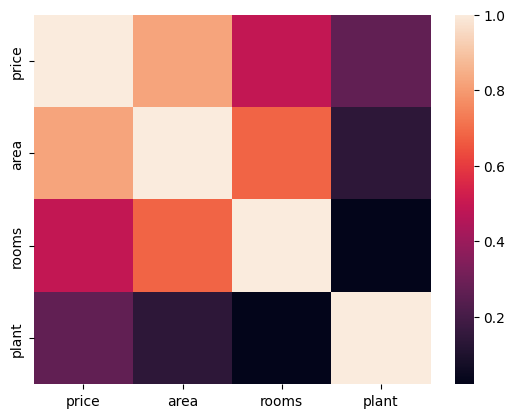

In [10]:
machine_learning.visuals_1(df)

In [11]:
df_dummy.to_csv("/Users/miguelpalospou/Desktop/IRONHACK/Projects/Final-project/data/dummy.csv", index=False)

Mean Absolute Error: 83670.1553348279


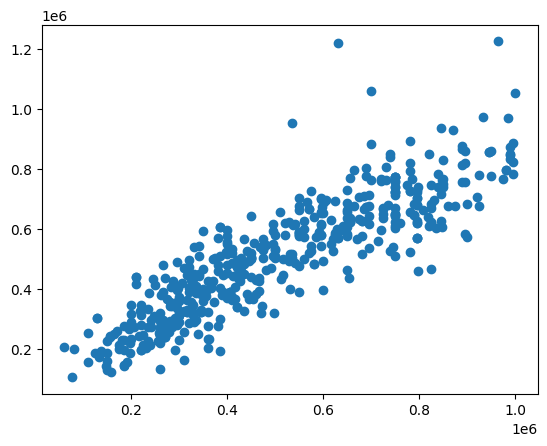

In [12]:
machine_learning.linear_model(df_dummy)


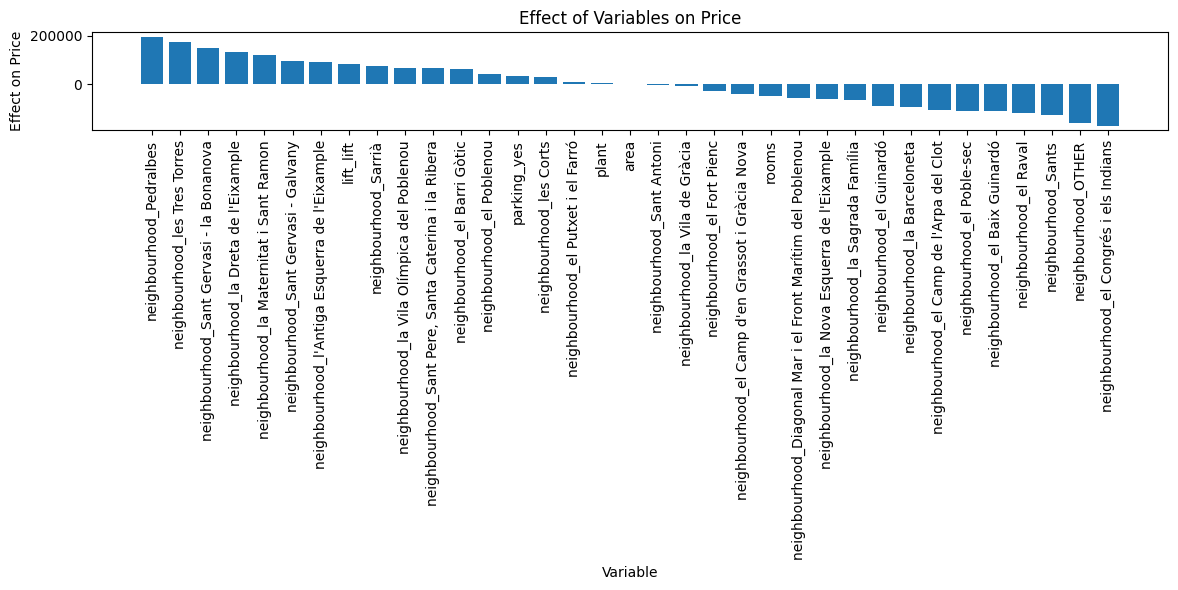

In [13]:
machine_learning.impact_variables(df_dummy)

In [14]:
machine_learning.reproduce_model(df_dummy)

R2 Score: 0.758237634134754
MAE: 77677.6406062871
mse: 11810863566.791662
MAPE: 0.17235942655794476
rmse: 108677.79702768943


StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interacti...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                              ('gbm', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [15]:

machine_learning.last_try(df_dummy)

R2 Score: 0.9653876920560197
MAE: 28926.373063973067
mse: 1690921766.8972898
MAPE: 0.06282258357188271
rmse: 41120.819141856715


RandomForestRegressor()

# Exporting